In [1]:
# !pip install -r requirements.txt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
import json
import mapclassify


In [2]:
plt.rcParams['figure.figsize'] = [10, 5]

df = pd.read_csv('merged_df.csv')
df.head()

,Unnamed: 0,COUNTRY,ID,CONTINENT,READING_AVG,MATH_AVG,SCIENCE_AVG,LS_start_x_salary,LS_10yr_salary,LS_15yr_salary,...,T_chan_sch_Value,TR_lot_stress_Value,TR_2_admin_stress_Value,T_age_50less_leve_5yr_Value,T_agree_mutual_supp_Value,TR_collb_PL_1xM_Value,T_agree_contr_course_Value,T_agree_opp_Value,PR_resp_MT_Value,TR_team_teach_1xM_Value
0,0,Austria,AUT,Europe,484.0,499,490,40411.13631,46965.07455,52537.94232,...,10.2,12.2,48.0,3.7,82.7,13.3,81.3,82.7,70.4,63.0
1,1,Canada,CAN,North America,520.0,512,518,37110.14206,55242.91899,57783.52522,...,22.9,26.3,29.3,7.2,82.5,29.2,65.4,81.4,20.9,22.2
2,2,Chile,CHL,South America,452.0,417,444,23428.61798,29004.07484,34231.21870,...,24.9,19.9,53.0,15.3,70.5,24.2,90.7,58.9,26.0,28.5
3,3,Colombia,COL,South America,412.0,391,413,17214.41417,31394.10786,31394.10786,...,24.6,13.8,49.0,5.3,76.0,19.4,88.3,79.4,32.1,27.7
4,4,Czech Republic,CSFR-CZE,Europe,490.0,499,497,18953.10651,20147.02283,21049.39167,...,10.4,10.6,61.0,12.1,86.9,23.0,92.6,83.3,71.6,7.1


In [3]:
with open('coordinates.json') as fp:
    pisa_countries_coordinates_dict = dict(json.load(fp))

filler_codes = {
     "CSFR-CZE": "CZE",
     "USSR-EST": "EST",
    # missing: france, norway, malta, singapore 
    # https://github.com/geopandas/geopandas/issues/1041
     "KOREA-NS": "PRK",
     "USSR-LVA": "LVA",
     "USSR-LTU": "LTU",
     "CSFR-SVK": "SVK",
     "FYUG-SVN": "SVN",
     "USSR-BLR": "BLR",
     "FYUG-BIH": "BIH",
     "FYUG-BIH": "BIH",
     "CHN-BSJZ": "CHN",
     "FYUG-HRV": "HRV",
     "USSR-GEO": "GEO",
     "CHN-HKG" : "CHN",
     "USSR-KAZ": "KAZ",
     "XK"      : "-99",
     "CHN-MO"  : "CHN",
     "USSR-MDA": "MDA",
     "MK"      : "MKD",
     "USSR-RUS": "RUS",
     "USSR-UKR": "UKR",
}

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

with open('coordinates.json') as fp:
    pisa_countries_coordinates_dict = dict(json.load(fp))


<ipython-input-4-a0d85f4c2fa2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pisa_math_avg_df['ID'] = pisa_math_avg_df['ID'].replace(filler_codes)


<AxesSubplot:>

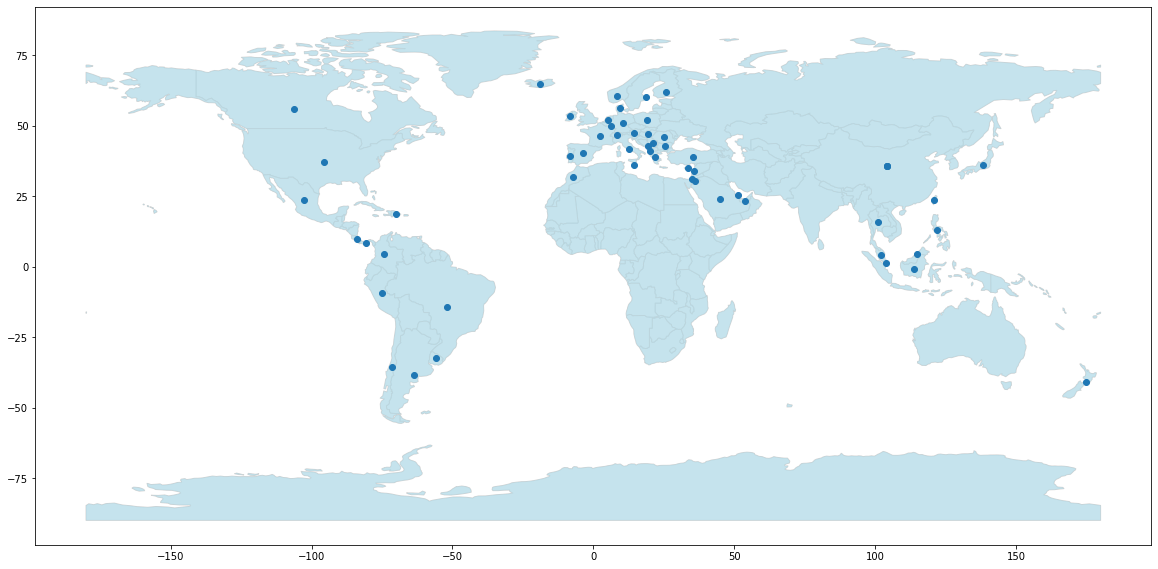

In [4]:
pisa_math_avg_df = df[["ID", "MATH_AVG", "COUNTRY", "CONTINENT"]]
pisa_math_avg_df['ID'] = pisa_math_avg_df['ID'].replace(filler_codes)

iso_df = pd.DataFrame.from_dict(pisa_countries_coordinates_dict,orient = 'index')
iso_df.columns = ['LATITUDE', 'LONGITUDE']
iso_df = iso_df.reset_index()
iso_df.columns = ['ID','LATITUDE', 'LONGITUDE']

mapping_df = pd.merge(pisa_math_avg_df, iso_df, on = 'ID', how = 'left')


gdf = geopandas.GeoDataFrame(
    mapping_df, 
    geometry=geopandas.points_from_xy(mapping_df.LONGITUDE, mapping_df.LATITUDE))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(20,10))
base = world.plot(color='white', edgecolor='lightgrey', ax=ax)
# world.plot(ax=ax, alpha=.7, color='pink')
world.plot(ax=base, alpha=.7, color='lightblue')

gdf.plot(ax=ax)

<ipython-input-5-03d6f21815ec>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pisa_math_avg_df['ID'] = pisa_math_avg_df['ID'].replace(filler_codes)


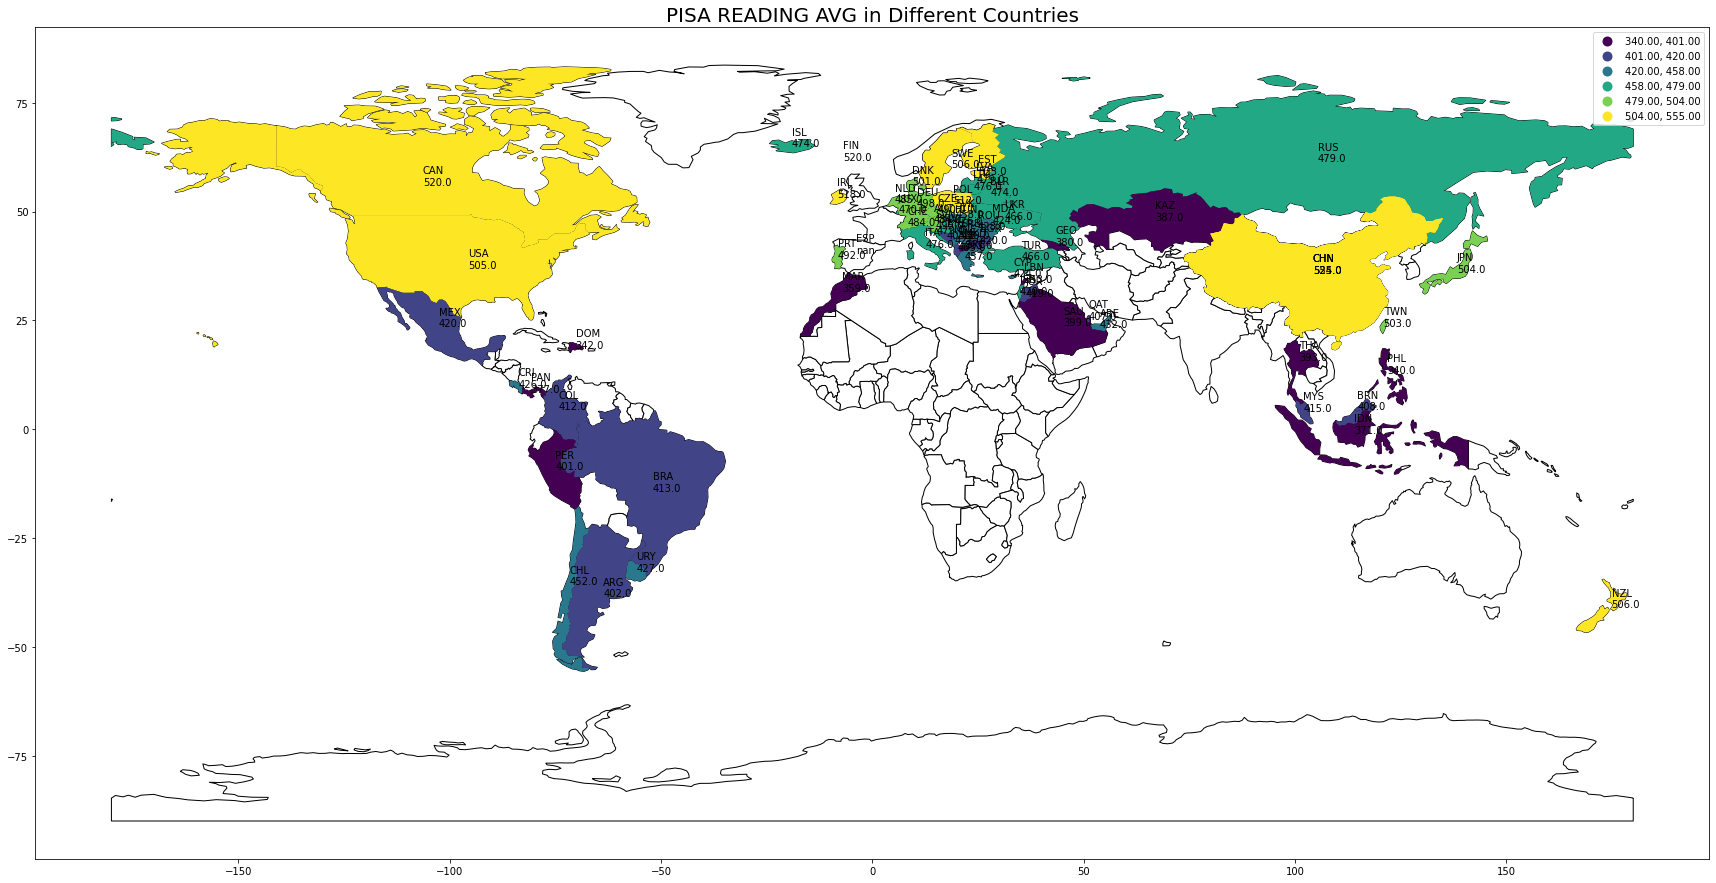

In [5]:
location = pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns = ['pop_est', 'continent', 'name', 'ID', 'gdp_md_est', 'geometry']

# pisa averages columns = ['READING_AVG', 'MATH_AVG', 'SCIENCE_AVG']
pisa_math_avg_df = df[["ID", "READING_AVG", "COUNTRY", "CONTINENT"]]
pisa_math_avg_df['ID'] = pisa_math_avg_df['ID'].replace(filler_codes)
location = location.rename(columns={"COUNTRY": "name"})

fig, ax = plt.subplots(figsize=(30, 25))

base = world.plot(color='white', edgecolor='black', ax=ax)

merged_world_math_df = pd.merge(world, pisa_math_avg_df, on = 'ID')
merged_world_math_pisa_df = merged_world_math_df.merge(location, on='name').reset_index()
merged_world_math_pisa_df = merged_world_math_pisa_df.to_crs(world.crs)

merged_world_math_pisa_df.plot(
    column='READING_AVG', 
    scheme="Quantiles",
    k=6,
    legend=True,
    ax=base,
)

plt.title('PISA READING AVG in Different Countries', fontsize=20)
for i in range(0, len(merged_world_math_pisa_df)):
    plt.text(
        float(merged_world_math_pisa_df.longitude[i]), 
        float(merged_world_math_pisa_df.latitude[i]), 
        "{}\n{}".format(
            merged_world_math_pisa_df['ID'][i],
            merged_world_math_pisa_df['READING_AVG'][i],
            size=10
        ))

In [6]:
# #  We create the geopandas json file from the geopandas data
# # This allows us to join the two and clean up the missing country codes
# json_bound = world[['name', 'ID']]
# geopands_iso_dict = {}

# for i, (name, id) in json_bound.iterrows():
#     geopands_iso_dict[id] = name


# with open('geopandas_iso_codes.json', 'w') as fp:
#     json.dump(geopands_iso_dict, fp)
